## 6장 4절 로지스틱 회귀(Logistic Regression)

### 1) 단일 클래스 분류

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_body = pd.read_csv('./data/bodyPerformance.csv')
df_body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [2]:
df_body['gender'] = np.where(df_body['gender']=='M', 0, 1)
df_body['class_1'] = np.where(df_body['class']=='A', 1, 0)
df_body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [3]:
from sklearn.model_selection import train_test_split

df_x = df_body.loc[:, 'age':'broad jump_cm']
df_y = df_body.loc[:, 'class_1']

In [4]:
print(list(df_body.columns.difference(['class','class_1'])))

['age', 'body fat_%', 'broad jump_cm', 'diastolic', 'gender', 'gripForce', 'height_cm', 'sit and bend forward_cm', 'sit-ups counts', 'systolic', 'weight_kg']


In [13]:
feature_columns = list(df_body.columns.difference(['class','class_1']))

df_x = df_body[feature_columns]
df_y = df_body['class_1']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, stratify=df_y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [15]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)

LogisticRegression()

In [16]:
df_proba = pd.DataFrame(data=logR.predict_proba(X_train))
cs=logR.decision_function(X_train)

df_proba

,0,1
0,0.867168,0.132832
1,0.336925,0.663075
2,0.610521,0.389479
3,0.216093,0.783907
4,0.998797,0.001203
...,...,...
9370,0.234845,0.765155
9371,0.972639,0.027361
9372,0.999830,0.000170
9373,0.048457,0.951543


In [19]:
df_agg = pd.concat([df_proba, pd.DataFrame(cs)], axis=1)
df_agg.columns = ['Not A', 'A', 'decision_function']

df_agg

,Not A,A,decision_function
0,0.867168,0.132832,-1.876145
1,0.336925,0.663075,0.677029
2,0.610521,0.389479,-0.449504
3,0.216093,0.783907,1.288579
4,0.998797,0.001203,-6.721578
...,...,...,...
9370,0.234845,0.765155,1.181152
9371,0.972639,0.027361,-3.570901
9372,0.999830,0.000170,-8.679965
9373,0.048457,0.951543,2.977399


In [20]:
df_agg.sort_values(by = 'decision_function', inplace=True)
df_agg.reset_index(inplace=True, drop=True)
df_agg

,Not A,A,decision_function
0,1.000000,1.707411e-08,-17.885702
1,1.000000,7.034789e-08,-16.469813
2,1.000000,8.306329e-08,-16.303663
3,1.000000,8.645318e-08,-16.263663
4,1.000000,1.203780e-07,-15.932629
...,...,...,...
9370,0.002251,9.977486e-01,6.093936
9371,0.002213,9.977866e-01,6.110989
9372,0.001992,9.980076e-01,6.216402
9373,0.001019,9.989809e-01,6.887846


In [22]:
import matplotlib.pyplot as plt

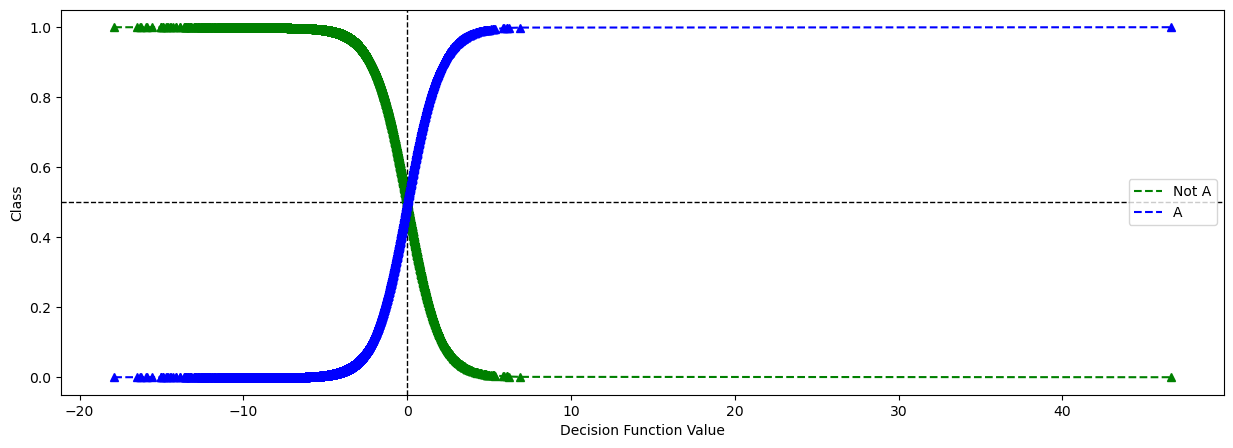

In [28]:
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle="--", color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df_agg['decision_function'], df_agg['Not A'], 'g--', label='Not A')
plt.plot(df_agg['decision_function'], df_agg['Not A'], 'g^')
plt.plot(df_agg['decision_function'], df_agg['A'], 'b--', label='A')
plt.plot(df_agg['decision_function'], df_agg['A'], 'b^')

plt.xlabel('Decision Function Value')
plt.ylabel('Class')

plt.legend(loc='best')
plt.show()


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')

print('정확도 \t{}%'.format(round(test_acc*100, 2)))
print('정밀도 \t{}%'.format(round(test_prc*100, 2)))
print('재현율 \t{}%'.format(round(test_rcll*100, 2)))
print('F1 \t{}%'.format(round(test_f1*100, 2)))

[[2774  240]
 [ 364  640]]


정확도 	84.97%
정밀도 	72.73%
재현율 	63.75%
F1 	67.94%


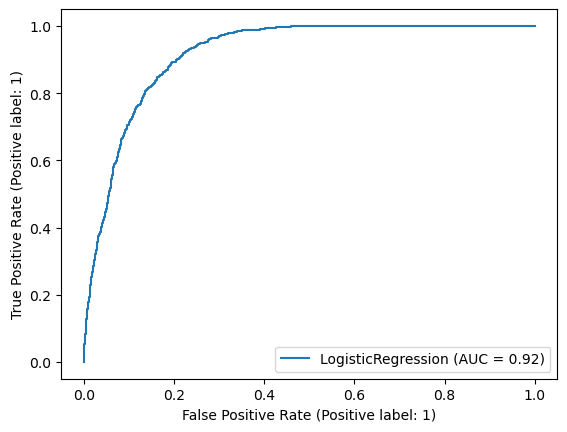

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, X_test, y_test)
plt.show()

### 2) 다중 클래스 분류 - 소프트맥스 회귀

In [35]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_body2 = pd.read_csv('./data/bodyPerformance.csv')
df_body2

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [36]:
df_body2['gender'] = np.where(df_body2['gender']=='M', 0 ,1)

mapping = {'A':0, 'B':1, 'C':2, 'D':3}
df_body2['class_2']=df_body2['class'].map(mapping)

df_body2

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [38]:
from sklearn.model_selection import train_test_split

feature_columns_2 = list(df_body2.columns.difference(['class', 'class_2']))

df_x2 = df_body2[feature_columns_2]
df_y2 = df_body2['class_2']

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_x2, df_y2, train_size=0.7, stratify=df_y2, random_state=1)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [39]:
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(X_train2, y_train2)

LogisticRegression(C=10, multi_class='multinomial')

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred2 = softm.predict(X_test2)

test_cm2 = confusion_matrix(y_true = y_test2, y_pred=pred2)
test_acc2 = accuracy_score(y_true = y_test2, y_pred=pred2)

print(test_cm2)
print('\n')
print('정확도\t{}%'.format(round(test_acc2*100, 2)))

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]


정확도	59.91%


In [42]:
softm.predict(X_test2.iloc[-1, :])

ValueError: Expected 2D array, got 1D array instead:
array=[ 28.   14.3 241.   74.    0.   56.3 184.5  26.   58.  147.   91.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.